In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# data loading
import sys
sys.path.append('../')
import bread.data, bread.vis, bread.vis.graph, bread.data.graph
from glob import glob

import torch
from torch_geometric.data import Data

import itertools
import numpy as np

# utility
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt

# Building assignment graphs (for inputs)

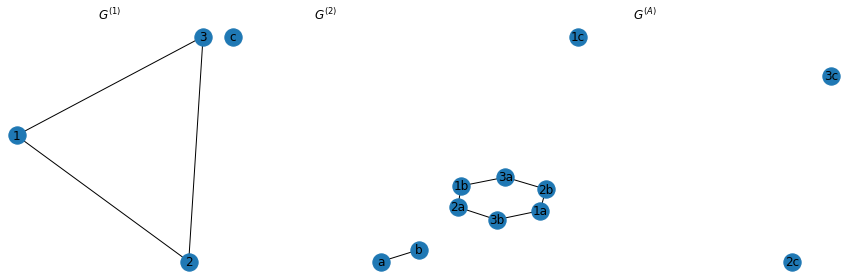

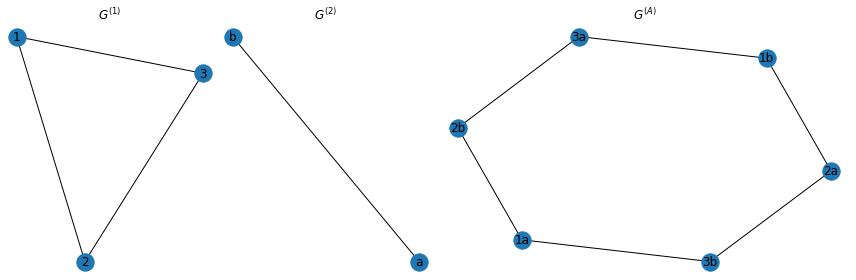

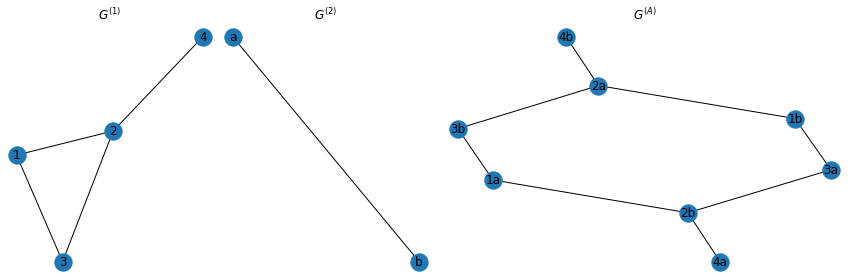

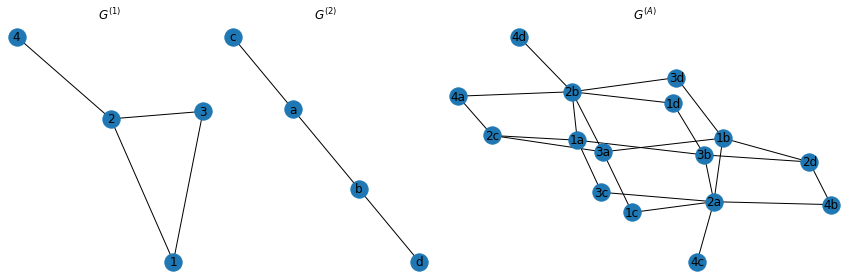

In [3]:
for g1, g2 in (
	(
		Data(x=torch.tensor([[0], [1], [2]]), edge_index=torch.tensor([[0, 0, 1], [1, 2, 2]]), edge_attr=torch.tensor([[0], [1], [2]], dtype=torch.float)),
		Data(x=torch.tensor([[0], [1], [2]]), edge_index=torch.tensor([[0], [1]]), edge_attr=torch.tensor([[10, 11, 12]], dtype=torch.float))
	),
	(
		Data(x=torch.tensor([[0], [1], [2]]), edge_index=torch.tensor([[0, 0, 1], [1, 2, 2]]), edge_attr=torch.tensor([[0], [1], [2]], dtype=torch.float)),
		Data(x=torch.tensor([[0], [1]]), edge_index=torch.tensor([[0], [1]]), edge_attr=torch.tensor([[10, 11, 12]], dtype=torch.float))
	),
	(
		Data(x=torch.tensor([[0], [1], [2], [3]]), edge_index=torch.tensor([[0, 0, 1, 1], [1, 2, 2, 3]]), edge_attr=torch.tensor([[0], [1], [2], [3]], dtype=torch.float)),
		Data(x=torch.tensor([[0], [1]]), edge_index=torch.tensor([[0], [1]]), edge_attr=torch.tensor([[10, 11, 12]], dtype=torch.float))
	),
	(
		Data(x=torch.tensor([[0], [1], [2], [3]]), edge_index=torch.tensor([[0, 0, 1, 1], [1, 2, 2, 3]]), edge_attr=torch.tensor([[0], [1], [2], [3]], dtype=torch.float)),
		Data(x=torch.tensor([[0], [1], [2], [3]]), edge_index=torch.tensor([[0, 0, 1], [1, 2, 3]]), edge_attr=torch.tensor([[10], [11], [12]], dtype=torch.float)),
	),
):
	gA = bread.data.graph.build_assignmentgraph(g1, g2)

	plt.close('all')
	bread.vis.graph.plot_assignmentgraph(g1, g2, gA)
	plt.show()

# Building assignment graphs (for outputs)

In [4]:
imgs_seg = bread.data.load_npz(sorted(glob('../data/segmentations/colony{:03d}/*.npz'.format(1))))
graphs = [bread.data.graph.from_npz(npz) for npz in bread.data.load_npz(sorted(glob('data/cellgraphs/colony{:03d}/*.npz'.format(1))))]

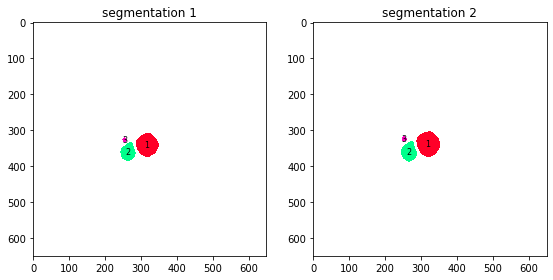

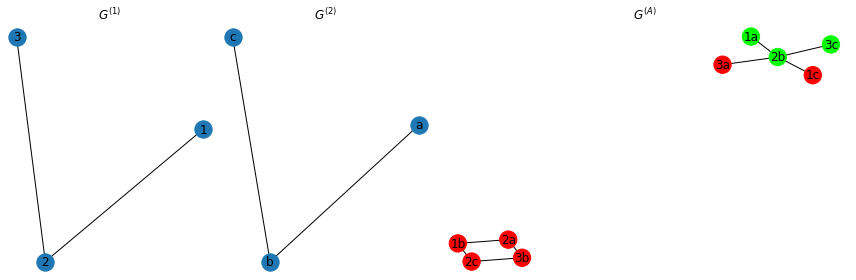

In [5]:
img_seg1, img_seg2 = imgs_seg[4], imgs_seg[5]
graph1, graph2 = graphs[4], graphs[5]

plt.close('all')
fig, ax = plt.subplots(ncols=2, figsize=(8, 4))
ax[0].set_title('segmentation 1')
ax[1].set_title('segmentation 2')
bread.vis.plot_seg(img_seg1, (fig, ax[0]))
bread.vis.plot_seg(img_seg2, (fig, ax[1]))
plt.show(fig)

bread.vis.graph.plot_assignmentgraph_track(img_seg1, img_seg2, graph1, graph2);

# Saving the assignment graph training data

We save only the first 100 assignment graphs, because their size grows very fast afterwards, and make it expensive to train with

In [6]:
colony_ids = (0, 1, 2, 3, 7)
time_index_num = 20

for colony_id in tqdm(colony_ids, desc='colony'):
	npzs = bread.data.load_npz(sorted(glob('data/cellgraphs/colony{:03d}/*.npz'.format(colony_id))))
	graphs = [bread.data.graph.from_npz(npz) for npz in npzs]
	imgs_seg = bread.data.load_npz(sorted(glob('../data/segmentations/colony{:03d}/*.npz'.format(colony_id))))

	for framediff in tqdm(range(1, time_index_num), desc='framediff', leave=False):
		for i in tqdm(range(min(len(graphs), 100)-framediff), desc='interframe', leave=False):
			g1, g2 = graphs[i], graphs[i+framediff]
			img_seg1, img_seg2 = imgs_seg[i], imgs_seg[i+framediff]

			# Compute the assignment graph
			gA = bread.data.graph.build_assignmentgraph(g1, g2)
			gAt = bread.data.graph.build_assignmentgraph_track(img_seg1, img_seg2)
			gA.y = gAt.x.squeeze()

			bread.data.dump_npz('data/assgraphs/colony{:03d}/framediff{:03d}/{:03d}.npz'.format(colony_id, framediff, i), gA.to_dict(), force=True)

colony:   0%|          | 0/5 [00:00<?, ?it/s]

framediff:   0%|          | 0/19 [00:00<?, ?it/s]

interframe:   0%|          | 0/99 [00:00<?, ?it/s]

interframe:   0%|          | 0/98 [00:00<?, ?it/s]

interframe:   0%|          | 0/97 [00:00<?, ?it/s]

interframe:   0%|          | 0/96 [00:00<?, ?it/s]

interframe:   0%|          | 0/95 [00:00<?, ?it/s]

interframe:   0%|          | 0/94 [00:00<?, ?it/s]

interframe:   0%|          | 0/93 [00:00<?, ?it/s]

interframe:   0%|          | 0/92 [00:00<?, ?it/s]

interframe:   0%|          | 0/91 [00:00<?, ?it/s]

interframe:   0%|          | 0/90 [00:00<?, ?it/s]

interframe:   0%|          | 0/89 [00:00<?, ?it/s]

interframe:   0%|          | 0/88 [00:00<?, ?it/s]

interframe:   0%|          | 0/87 [00:00<?, ?it/s]

interframe:   0%|          | 0/86 [00:00<?, ?it/s]

interframe:   0%|          | 0/85 [00:00<?, ?it/s]

interframe:   0%|          | 0/84 [00:00<?, ?it/s]

interframe:   0%|          | 0/83 [00:00<?, ?it/s]

interframe:   0%|          | 0/82 [00:00<?, ?it/s]

interframe:   0%|          | 0/81 [00:00<?, ?it/s]

framediff:   0%|          | 0/19 [00:00<?, ?it/s]

interframe:   0%|          | 0/99 [00:00<?, ?it/s]

interframe:   0%|          | 0/98 [00:00<?, ?it/s]

interframe:   0%|          | 0/97 [00:00<?, ?it/s]

interframe:   0%|          | 0/96 [00:00<?, ?it/s]

interframe:   0%|          | 0/95 [00:00<?, ?it/s]

interframe:   0%|          | 0/94 [00:00<?, ?it/s]

interframe:   0%|          | 0/93 [00:00<?, ?it/s]

interframe:   0%|          | 0/92 [00:00<?, ?it/s]

interframe:   0%|          | 0/91 [00:00<?, ?it/s]

interframe:   0%|          | 0/90 [00:00<?, ?it/s]

interframe:   0%|          | 0/89 [00:00<?, ?it/s]

interframe:   0%|          | 0/88 [00:00<?, ?it/s]

interframe:   0%|          | 0/87 [00:00<?, ?it/s]

interframe:   0%|          | 0/86 [00:00<?, ?it/s]

interframe:   0%|          | 0/85 [00:00<?, ?it/s]

interframe:   0%|          | 0/84 [00:00<?, ?it/s]

interframe:   0%|          | 0/83 [00:00<?, ?it/s]

interframe:   0%|          | 0/82 [00:00<?, ?it/s]

interframe:   0%|          | 0/81 [00:00<?, ?it/s]

framediff:   0%|          | 0/19 [00:00<?, ?it/s]

interframe:   0%|          | 0/99 [00:00<?, ?it/s]

interframe:   0%|          | 0/98 [00:00<?, ?it/s]

interframe:   0%|          | 0/97 [00:00<?, ?it/s]

interframe:   0%|          | 0/96 [00:00<?, ?it/s]

interframe:   0%|          | 0/95 [00:00<?, ?it/s]

interframe:   0%|          | 0/94 [00:00<?, ?it/s]

interframe:   0%|          | 0/93 [00:00<?, ?it/s]

interframe:   0%|          | 0/92 [00:00<?, ?it/s]

interframe:   0%|          | 0/91 [00:00<?, ?it/s]

interframe:   0%|          | 0/90 [00:00<?, ?it/s]

interframe:   0%|          | 0/89 [00:00<?, ?it/s]

interframe:   0%|          | 0/88 [00:00<?, ?it/s]

interframe:   0%|          | 0/87 [00:00<?, ?it/s]

interframe:   0%|          | 0/86 [00:00<?, ?it/s]

interframe:   0%|          | 0/85 [00:00<?, ?it/s]

interframe:   0%|          | 0/84 [00:00<?, ?it/s]

interframe:   0%|          | 0/83 [00:00<?, ?it/s]

interframe:   0%|          | 0/82 [00:00<?, ?it/s]

interframe:   0%|          | 0/81 [00:00<?, ?it/s]

framediff:   0%|          | 0/19 [00:00<?, ?it/s]

interframe:   0%|          | 0/99 [00:00<?, ?it/s]

interframe:   0%|          | 0/98 [00:00<?, ?it/s]

interframe:   0%|          | 0/97 [00:00<?, ?it/s]

interframe:   0%|          | 0/96 [00:00<?, ?it/s]

interframe:   0%|          | 0/95 [00:00<?, ?it/s]

interframe:   0%|          | 0/94 [00:00<?, ?it/s]

interframe:   0%|          | 0/93 [00:00<?, ?it/s]

interframe:   0%|          | 0/92 [00:00<?, ?it/s]

interframe:   0%|          | 0/91 [00:00<?, ?it/s]

interframe:   0%|          | 0/90 [00:00<?, ?it/s]

interframe:   0%|          | 0/89 [00:00<?, ?it/s]

interframe:   0%|          | 0/88 [00:00<?, ?it/s]

interframe:   0%|          | 0/87 [00:00<?, ?it/s]

interframe:   0%|          | 0/86 [00:00<?, ?it/s]

interframe:   0%|          | 0/85 [00:00<?, ?it/s]

interframe:   0%|          | 0/84 [00:00<?, ?it/s]

interframe:   0%|          | 0/83 [00:00<?, ?it/s]

interframe:   0%|          | 0/82 [00:00<?, ?it/s]

interframe:   0%|          | 0/81 [00:00<?, ?it/s]

framediff:   0%|          | 0/19 [00:00<?, ?it/s]

interframe:   0%|          | 0/99 [00:00<?, ?it/s]

interframe:   0%|          | 0/98 [00:00<?, ?it/s]

interframe:   0%|          | 0/97 [00:00<?, ?it/s]

interframe:   0%|          | 0/96 [00:00<?, ?it/s]

interframe:   0%|          | 0/95 [00:00<?, ?it/s]

interframe:   0%|          | 0/94 [00:00<?, ?it/s]

interframe:   0%|          | 0/93 [00:00<?, ?it/s]

interframe:   0%|          | 0/92 [00:00<?, ?it/s]

interframe:   0%|          | 0/91 [00:00<?, ?it/s]

interframe:   0%|          | 0/90 [00:00<?, ?it/s]

interframe:   0%|          | 0/89 [00:00<?, ?it/s]

interframe:   0%|          | 0/88 [00:00<?, ?it/s]

interframe:   0%|          | 0/87 [00:00<?, ?it/s]

interframe:   0%|          | 0/86 [00:00<?, ?it/s]

interframe:   0%|          | 0/85 [00:00<?, ?it/s]

interframe:   0%|          | 0/84 [00:00<?, ?it/s]

interframe:   0%|          | 0/83 [00:00<?, ?it/s]

interframe:   0%|          | 0/82 [00:00<?, ?it/s]

interframe:   0%|          | 0/81 [00:00<?, ?it/s]

# Loading data saved to disk

In [7]:
data = bread.data.graph.from_npz(bread.data.load_npz('data/assgraphs/colony000/framediff001/050.npz'))

In [8]:
data.x

tensor([[2.4890e+03, 2.8310e+01, 5.7234e-01, 2.5065e+03, 2.8400e+01, 5.6369e-01],
        [2.4890e+03, 2.8310e+01, 5.7234e-01, 3.5020e+03, 3.3477e+01, 3.7335e-01],
        [2.4890e+03, 2.8310e+01, 5.7234e-01, 2.1600e+03, 2.6323e+01, 4.8986e-01],
        [2.4890e+03, 2.8310e+01, 5.7234e-01, 2.5675e+03, 2.8694e+01, 5.2518e-01],
        [2.4890e+03, 2.8310e+01, 5.7234e-01, 1.5400e+03, 2.2367e+01, 6.2888e-01],
        [2.4890e+03, 2.8310e+01, 5.7234e-01, 1.9365e+03, 2.4870e+01, 6.1321e-01],
        [2.4890e+03, 2.8310e+01, 5.7234e-01, 1.6550e+03, 2.2995e+01, 4.9606e-01],
        [2.4890e+03, 2.8310e+01, 5.7234e-01, 1.5420e+03, 2.2235e+01, 3.1411e-01],
        [2.4890e+03, 2.8310e+01, 5.7234e-01, 5.4450e+02, 1.3283e+01, 5.2869e-01],
        [3.4600e+03, 3.3258e+01, 3.8255e-01, 2.5065e+03, 2.8400e+01, 5.6369e-01],
        [3.4600e+03, 3.3258e+01, 3.8255e-01, 3.5020e+03, 3.3477e+01, 3.7335e-01],
        [3.4600e+03, 3.3258e+01, 3.8255e-01, 2.1600e+03, 2.6323e+01, 4.8986e-01],
        [3.4600e

In [9]:
data.edge_index

tensor([[ 0,  0,  0,  ..., 79, 80, 80],
        [10, 11, 12,  ...,  2,  0,  6]])

In [10]:
data.edge_attr

tensor([[63.0975, -2.0063,  3.0000, 64.9629, -2.0352,  3.6056],
        [63.0975, -2.0063,  3.0000, 50.1368,  2.2773,  2.2361],
        [63.0975, -2.0063,  3.0000, 55.0818, -0.9162,  3.1623],
        ...,
        [45.1795,  0.5402,  2.8284, 48.4419,  1.2742,  2.0000],
        [45.1795,  0.5402,  2.8284, 45.5784,  0.5340,  2.2361],
        [45.1795,  0.5402,  2.8284, 45.5623,  2.4207,  8.9443]])

In [11]:
data.y

tensor([ True, False, False, False, False, False, False, False, False, False,
         True, False, False, False, False, False, False, False, False, False,
         True, False, False, False, False, False, False, False, False, False,
         True, False, False, False, False, False, False, False, False, False,
         True, False, False, False, False, False, False, False, False, False,
         True, False, False, False, False, False, False, False, False, False,
         True, False, False, False, False, False, False, False, False, False,
         True, False, False, False, False, False, False, False, False, False,
         True])